In [ ]:
import itertools

def can_make_number(number, cubes):
    for cube in cubes:
        if number[0] in cube:
            remaining_cubes = cubes.copy()
            remaining_cubes.remove(cube)
            for cube2 in remaining_cubes:
                if number[1] in cube2:
                    remaining_cubes2 = remaining_cubes.copy()
                    remaining_cubes2.remove(cube2)
                    for cube3 in remaining_cubes2:
                        if number[2] in cube3:
                            remaining_cubes3 = remaining_cubes2.copy()
                            remaining_cubes3.remove(cube3)
                            for cube4 in remaining_cubes3:
                                if number[3] in cube4:
                                    return True
    return False

def find_max_n():
    for cube in itertools.product(range(10), repeat=6):
        for cube2 in itertools.product(range(10), repeat=6):
            for cube3 in itertools.product(range(10), repeat=6):
                for cube4 in itertools.product(range(10), repeat=6):
                    cubes = [set(cube), set(cube2), set(cube3), set(cube4)]
                    n = 1
                    while True:
                        number = str(n).zfill(4)
                        if not can_make_number(number, cubes):
                            break
                        n += 1
                    max_n = max(max_n, n - 1) if 'max_n' in locals() else n - 1
    return max_n

print(find_max_n())


In [2]:
df = pd.read_csv("data_sort") 
print(df)
df['128']

   Unnamed: 0    64   1   2   3   4   5   6   7   8  ...  1024  2048  4096  \
0  quick sort  1226  43  40  42  42  43  41  44  40  ...   413   853   803   

   8192  16384  32768  65536  131072  262144  524288  
0  1110   1619   3426   7500   16551   37283   72873  

[1 rows x 145 columns]


0    72319
Name: 128, dtype: int64

In [5]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50.0 * np.log1p(np.arange(n))
ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

LinearRegression()

[ -50.          -49.23282188  -48.46564376 ... 1098.46564376 1099.23282188
 1100.        ]
<class 'numpy.ndarray'>


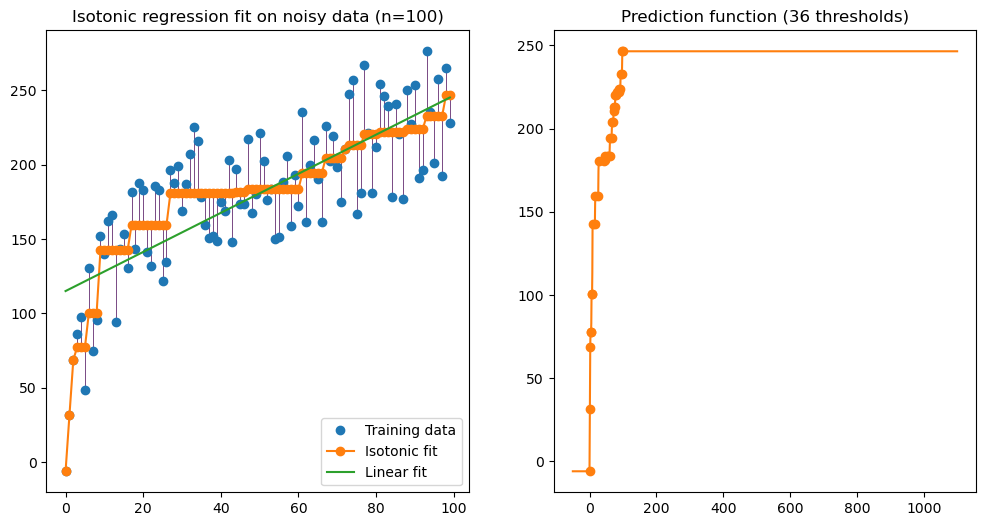

In [12]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, "C0.", markersize=12)
ax0.plot(x, y_, "C1.-", markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), "C2-")
ax0.add_collection(lc)
ax0.legend(("Training data", "Isotonic fit", "Linear fit"), loc="lower right")
ax0.set_title("Isotonic regression fit on noisy data (n=%d)" % n)

x_test = np.linspace(-50, 1100, 1500)
print(x_test)
ax1.plot(x_test, ir.predict(x_test), "C1-")
ax1.plot(ir.X_thresholds_, ir.y_thresholds_, "C1.", markersize=12)
ax1.set_title("Prediction function (%d thresholds)" % len(ir.X_thresholds_))
print(type(ir.X_thresholds_))
plt.show()